In [ ]:
#necessary libraries
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
import pandas as pd
import matplotlib.pyplot as plt
#opening a google spreadsheet
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1_o5exx8G0__VQVVWgG7l1YbT_w3qdxLN7Hy9pjvyNfQ/edit#gid=340449426')
sheet = wb.worksheet('Funnel')
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
#showing a sample of the dataframe
df.head(5)

,Year,Month,Segment,Region,KPI,ValueType,Value
1,2020,12,Clients,India,Lv1_Visitors,Actuals,"3,665,558"
2,2020,12,Clients,India,Lv2_Visitors,Actuals,"2,689,569"
3,2020,12,Clients,India,Lv3_Visitors,Actuals,"1,300,571"
4,2020,12,Clients,India,Lv4_Visitors,Actuals,"717,608"
5,2020,12,Clients,India,Lv3_Visitors,Actuals,"706,677"


,Year,Month,Segment,Region,KPI,ValueType,Value
1,2020,12,Clients,India,Lv1_Visitors,Actuals,"3,665,558"
2,2020,12,Clients,India,Lv2_Visitors,Actuals,"2,689,569"
3,2020,12,Clients,India,Lv3_Visitors,Actuals,"1,300,571"
4,2020,12,Clients,India,Lv4_Visitors,Actuals,"717,608"
5,2020,12,Clients,India,Lv3_Visitors,Actuals,"706,677"


Visitors segmented by each level.
percentage difference in the number of visitors between different regions and years

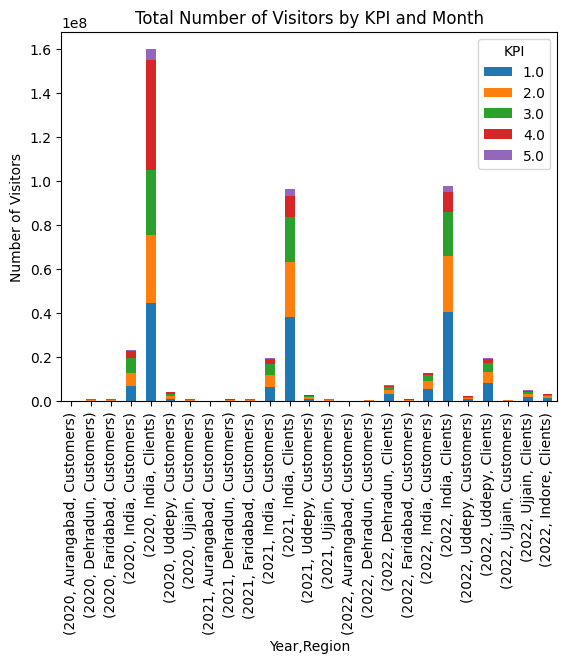

<ipython-input-3-e679b6541480>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['Region', 'Year']).sum()


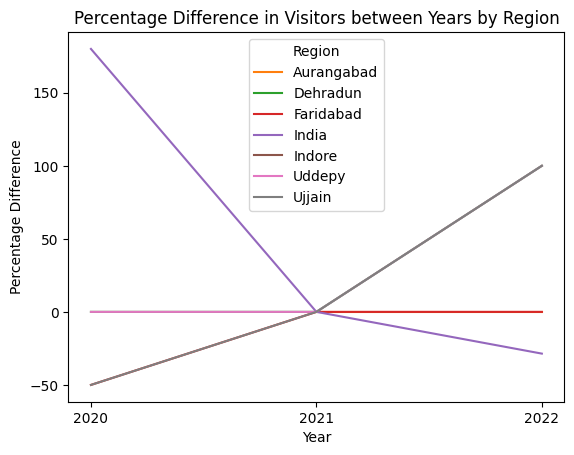

In [ ]:
# Convert the "KPI" column to numerical values
KPI_dict = {'Lv1_Visitors': 1, 'Lv2_Visitors': 2, 'Lv3_Visitors': 3, 'Lv4_Visitors': 4, 'Lv5_Visitors': 5}
df['KPI'] = df['KPI'].map(KPI_dict)
#removing the commas in the column Value and converting the values from string to integer
df['Value'] = df['Value'].str.replace(',', '').astype(int)
# Create a pivot table with year Region and Segment as index, columns as KPI and
pv=df.pivot_table('Value', index=['Year', 'Region', 'Segment'], columns='KPI',aggfunc='sum')
pv.plot(kind='bar', stacked=True)
plt.title('Total Number of Visitors by KPI and Month')
plt.xlabel('Year,Region')
plt.ylabel('Number of Visitors')
plt.show()
grouped = df.groupby(['Region', 'Year']).sum()
grouped['Percent Difference'] = grouped['KPI'].pct_change() * 100
import seaborn as sns
sns.lineplot(data=grouped, x='Year', y='Percent Difference', hue='Region')
plt.title('Percentage Difference in Visitors between Years by Region')
plt.xlabel('Year')
plt.ylabel('Percentage Difference')
plt.show()


In [ ]:
pv

KPI                             1.0       2.0       3.0       4.0      5.0
Year Region     Segment                                                   
2020 Aurangabad Customers     92083     63071     88109     29622    12612
     Dehradun   Customers    402599    295615    311845    111753    50258
     Faridabad  Customers    312711    275273    357617    166721    57959
     India      Customers   7244008   5886745   6796695   2932709   723855
                Clients    44759406  30956955  29269066  50321187  4566680
     Uddepy     Customers   1299320    979208   1304744    597155   195930
     Ujjain     Customers    369639    285890    332701    136803    51954
2021 Aurangabad Customers    102100     71711     81673     31773    12801
     Dehradun   Customers    352787    250456    214565     78363    34827
     Faridabad  Customers    359870    286148    306888    140728    45724
     India      Customers   6777627   5252311   5100103   2068321   505576
                Clients    38521318  25041185  20318169   9319232  3238759
     Uddepy     Customers   1068843    772889    809171    365173   114830
     Ujjain     Customers    335540    232055    220982     94301    37148
2022 Aurangabad Customers     82786     54252     39666     14656     5088
     Dehradun   Customers    354578    227803    115708     36457    12782
                Clients     3182356   1883092   1435172    658779   305718
     Faridabad  Customers    397426    274584    186429     50478    12487
     India      Customers   5549050   3841281   2602188    821483   187150
                Clients    40581059  25636065  19759783   8982108  2905398
     Uddepy     Customers   1104680    648398    502884    222460    68417
                Clients     8427909   5024979   4124883   1532329   650078
     Ujjain     Customers    294943    180013    100001     35434    11400
                Clients     2137748   1240580   1058730    479266   205150
     Indore     Clients     1482479    872927    661969    361346   165145

In [ ]:
a={}
s=[1,2,3]

a[s[0]]=11
a
a[s[1]]=12
a

{1: 11, 2: 12}

In [ ]:
def isIsomorphic(s: str, t: str) -> bool:
        if len(s)!=len(t):
            return False

        a={}

        for i in range(len(s)):
            if s[i] not in a:
                a[s[i]]=t[i]
            elif t[i]!=a[s[i]]:
                return False

        return True


isIsomorphic('egg','faa')

True

Outliers Identification and handling

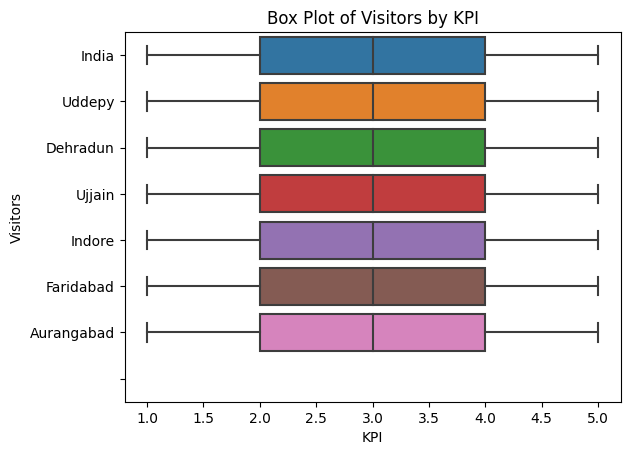

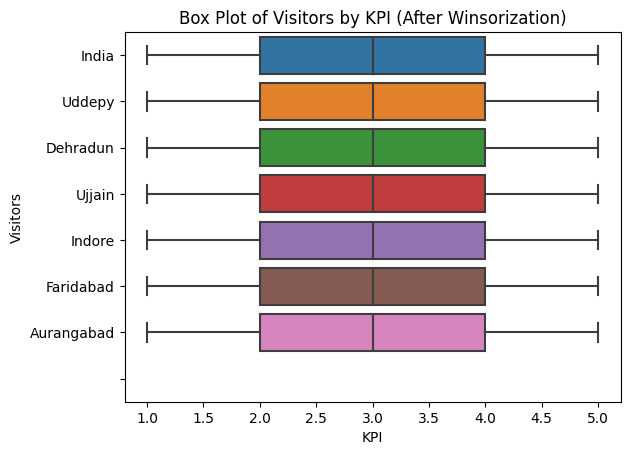

In [ ]:
#outliers identification
sns.boxplot(data=df, x='KPI', y='Region')
plt.title('Box Plot of Visitors by KPI')
plt.xlabel('KPI')
plt.ylabel('Visitors')
plt.show()

# Remove outliers
df['KPI'] = df['KPI'].clip(lower=df['KPI'].quantile(0.05), upper=df['KPI'].quantile(0.95))

# Box plot after outlier treatment
sns.boxplot(data=df, x='KPI', y='Region')
plt.title('Box Plot of Visitors by KPI (After Winsorization)')
plt.xlabel('KPI')
plt.ylabel('Visitors')
plt.show()

Part 2: Prescriptive Analysis. Creating a pivot table

In [ ]:
df_transposed = df.pivot_table(index=['Region', 'Segment','ValueType', 'Year', 'Month'], columns='KPI', values='Value', fill_value=0).reset_index()

# Rename the columns to remove the "KPI_" prefix from each column
df_transposed.columns = ['Region', 'Segment', 'ValueType','Year', 'Month', 'Lv1_Visitors', 'Lv2_Visitors', 'Lv3_Visitors', 'Lv4_Visitors', 'Lv5_Visitors']
df_transposed.head(5)

,Region,Segment,ValueType,Year,Month,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
0,Aurangabad,Customers,Actuals,2020,1,7540,4992,6850.0,2157.0,934.0
1,Aurangabad,Customers,Actuals,2020,10,8646,6007,9067.0,3246.0,1363.0
2,Aurangabad,Customers,Actuals,2020,11,7792,5549,7590.0,2672.0,1118.0
3,Aurangabad,Customers,Actuals,2020,12,6103,4399,6178.0,2250.0,897.0
4,Aurangabad,Customers,Actuals,2020,2,7092,4539,6080.0,1649.0,693.0


Worst performing region yearwise and identification of best region

In [ ]:
# Group by Region and sum the visitors for each year
Region_totals = df_transposed.groupby(['Region','Year'])[['Lv1_Visitors', 'Lv2_Visitors', 'Lv3_Visitors', 'Lv4_Visitors', 'Lv5_Visitors']].sum()
# Calculate the total visitors for each Region across all years
Region_totals['total'] = Region_totals.sum(axis=1)
# Find the Region with the lowest total visitors
worst_performers = Region_totals.groupby('Year')['total'].idxmin()
print('The Region with the lowest total visitors is', worst_performers)

growth_rates = {}
for Region in Region_totals.index.levels[0]:
    Region_data = Region_totals.loc[Region]
    growth_rates[Region] = Region_data['total'].pct_change()

# Find the Region with the highest average growth rate over all years
best_growth_Region = max(growth_rates, key=lambda x: growth_rates[x].mean())

# Print the growth rates for each Region
for Region, growth_rate in growth_rates.items():
    print(f"Growth rate for {Region}:")
    print(growth_rate)
    print()

# Print the Region with the highest average growth rate
print(f"Region with the highest average growth rate: {best_growth_Region}")

The Region with the lowest total visitors is Year
2020    (Aurangabad, 2020)
2021    (Aurangabad, 2021)
2022    (Aurangabad, 2022)
Name: total, dtype: object
Growth rate for Aurangabad:
Year
2020         NaN
2021    0.051002
2022   -0.345300
Name: total, dtype: float64

Growth rate for Dehradun:
Year
2020         NaN
2021   -0.205681
2022    7.821120
Name: total, dtype: float64

Growth rate for Faridabad:
Year
2020         NaN
2021   -0.026424
2022   -0.191295
Name: total, dtype: float64

Growth rate for India:
Year
2020         NaN
2021   -0.294771
2022    0.111941
Name: total, dtype: float64

Growth rate for Indore:
Year
2022   NaN
Name: total, dtype: float64

Growth rate for Uddepy:
Year
2020         NaN
2021   -0.284586
2022    6.124780
Name: total, dtype: float64

Growth rate for Ujjain:
Year
2020         NaN
2021   -0.218321
2022    5.242503
Name: total, dtype: float64

Region with the highest average growth rate: Dehradun


Creation of a parameter

In [ ]:
# Add the new feature (Level 5 visitors/Level 1 visitors)
df_transposed['Level5_Lv1_Ratio'] = df_transposed['Lv5_Visitors'] / df_transposed['Lv1_Visitors']

# Get the top 3 states based on the new feature for all available Segments and each given year
top_states = df_transposed.groupby(['Segment', 'Year']).apply(lambda x: x.nlargest(3, 'Level5_Lv1_Ratio')).reset_index(drop=True)
top_states.head(5)

,Region,Segment,ValueType,Year,Month,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Level5_Lv1_Ratio
0,India,Clients,Actuals,2020,4,4583672,3157506,1654703.0,875325.5,277563.5,0.060555
1,India,Clients,Actuals,2020,5,4703447,3333479,1696755.0,19204007.5,267753.5,0.056927
2,India,Clients,Actuals,2020,3,3453194,2334668,1220181.0,593411.0,190377.0,0.055131
3,India,Clients,Actuals,2021,1,3709579,2737312,1034586.5,464952.5,167466.0,0.045144
4,India,Clients,Actuals,2021,11,3665788,2261094,921719.0,443941.5,160898.5,0.043892


Creation of a new parameter other than the previous one. level 3 is chosing an item and level 5 is purchasing it.


In [ ]:
#Create any other metric apart from (Level5 visitors/Level1 visitors)
df_transposed['Level5_Lv3_Ratio'] = df_transposed['Lv5_Visitors'] / df_transposed['Lv3_Visitors']
# Get the top 3 states based on the new feature for all available Segments and each given year
top_states = df_transposed.groupby(['Segment', 'Year']).apply(lambda x: x.nlargest(3, 'Level5_Lv3_Ratio')).reset_index(drop=True)
top_states.head(5)

,Region,Segment,ValueType,Year,Month,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Level5_Lv1_Ratio,Level5_Lv3_Ratio
0,India,Clients,Actuals,2020,11,3634761,2510682,1048693.5,469178.0,176848.5,0.048655,0.168637
1,India,Clients,Actuals,2020,4,4583672,3157506,1654703.0,875325.5,277563.5,0.060555,0.167742
2,India,Clients,Actuals,2020,12,3665558,2689569,1003624.0,448866.5,165245.5,0.045081,0.164649
3,India,Clients,Actuals,2021,11,3665788,2261094,921719.0,443941.5,160898.5,0.043892,0.174564
4,India,Clients,Actuals,2021,10,3223253,2025461,853190.0,390150.0,140249.5,0.043512,0.164382


Part 3: Prediction. Predicting number of visitors for next 6 months

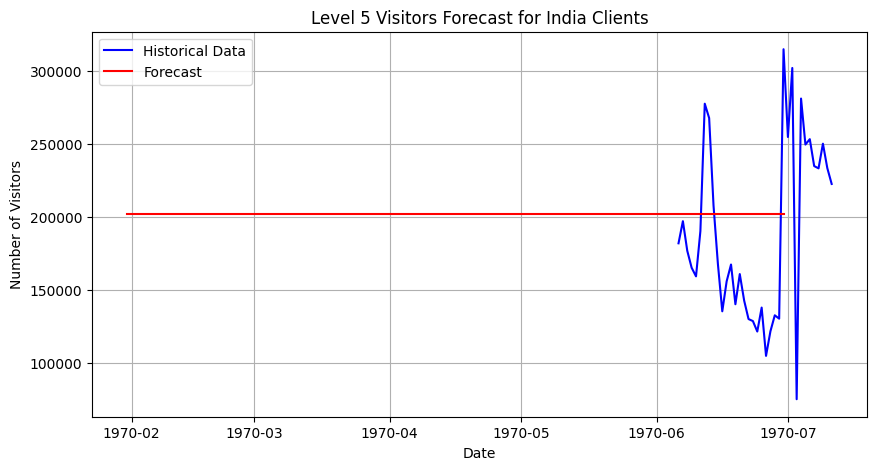

RMSE: 37518.17, MAPE: 0.15


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def predict_future(Region='Region', Segment='Segment', start_year=2020, end_year=2022):
    df_transpose = df.pivot_table(index=['Region', 'Segment', 'ValueType', 'Year', 'Month'], columns='KPI', values='Value', fill_value=0).reset_index()
    df_transpose['Date'] = df_transpose['Month'] + '-' + df_transpose['Year']
    df_transpose['Date'] = pd.to_datetime(df_transpose['Date'], format='%m-%Y')
    df_transpose.drop(['Month', 'Year'], axis=1, inplace=True)
    df_transpose.columns = ['Region', 'Segment', 'ValueType', 'Lv1_Visitors', 'Lv2_Visitors', 'Lv3_Visitors', 'Lv4_Visitors', 'Lv5_Visitors', 'Date']
    filtered_data = df_transpose[(df_transpose['Region'] == Region) & (df_transpose['Segment'] == Segment)]
    df_filtered = filtered_data.loc[(filtered_data['Date'].dt.year >= start_year) & (filtered_data['Date'].dt.year <= end_year)]

    train_data = df_filtered['Lv5_Visitors'][:-6]
    test_data = df_filtered['Lv5_Visitors'][-6:]

    # Compute the rolling average of the training set
    rolling_avg = train_data.rolling(window=3).mean().iloc[-1]

    forecast_start_date = df_filtered['Date'].max() + pd.DateOffset(months=1)
    forecast_dates = pd.date_range(start=forecast_start_date, periods=6, freq='M')

    # Repeat the rolling average for the forecast period
    forecast = [rolling_avg] * 6
    forecast_df = pd.DataFrame({'Lv5_Visitors': forecast}, index=pd.date_range(start=test_data.index[0], periods=6, freq='M'))

    # Ensure that forecast_df has the same columns as df_filtered
    forecast_df = forecast_df.reindex(columns=df_filtered.columns)
    # Calculate RMSE and MAPE
    rmse = np.sqrt(mean_squared_error(test_data, forecast_df['Lv5_Visitors']))
    mape = mean_absolute_percentage_error(test_data, forecast_df['Lv5_Visitors'])
    # Plot the forecast
    plt.figure(figsize=(10,5))
    plt.title('Level 5 Visitors Forecast for India Clients')
    plt.xlabel('Date')
    plt.ylabel('Number of Visitors')
    plt.plot(df_filtered['Lv5_Visitors'], color='blue', label='Historical Data')
    plt.plot(forecast_df['Lv5_Visitors'], color='red', label='Forecast')
    plt.legend()
    plt.grid()
    # plt.savefig('level_5_visitors_forecast.png')
    plt.title(f'Level 5 Visitors Forecast for {Region} {Segment}')
    plt.legend()
    plt.show()

    # Print RMSE and MAPE
    print(f'RMSE: {rmse:.2f}, MAPE: {mape:.2f}')

predict_future('India', 'Clients', 2020, 2022)


Part 4:A/B Testing

In [ ]:
#importing necessary libraries and creating a dataframe
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1_o5exx8G0__VQVVWgG7l1YbT_w3qdxLN7Hy9pjvyNfQ/edit#gid=509007999')
sheet = wb.worksheet('AB_Test')
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df.head(5)
df.info()
# Split the data into control and treatment groups
control = df[df['Variations'] == 'Control']
treatment = df[df['Variations'] == 'Treatment']

# Calculate the click-through rate (CTR) for each group
control['Clicks']=control['Clicks'].astype(int)
control['Visitors']=control['Visitors'].astype(int)
treatment['Visitors']=treatment['Visitors'].astype(int)
treatment['Clicks']=treatment['Clicks'].astype(int)
control_ctr = control['Clicks'].sum() / control['Visitors'].sum()
treatment_ctr = treatment['Clicks'].sum() / treatment['Visitors'].sum()

# Print the CTR for each group
print('Control CTR:', control_ctr)
print('Treatment CTR:', treatment_ctr)

# Calculate the p-value using a two-tailed t-test
p_value = ttest_ind(control['Clicks'], treatment['Clicks']).pvalue

# Print the p-value
print('p-value:', p_value)

# Check if the results are statistically significant (e.g., if p-value < 0.05)
if p_value < 0.05:
    print('The treatment variation is statistically better than the control variation.')
else:
    print('There is no statistically significant difference between the control and treatment Variations.')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 1 to 18099
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        18099 non-null  object
 1   Address     18099 non-null  object
 2   Variations  18099 non-null  object
 3   DeviceType  18099 non-null  object
 4   Clicks      18099 non-null  object
 5   Visitors    18099 non-null  object
dtypes: object(6)
memory usage: 848.5+ KB
Control CTR: 0.10263612075235362
Treatment CTR: 0.2343454801719027
p-value: 6.006205939916319e-18
The treatment variation is statistically better than the control variation.


<ipython-input-14-e9f1dc684fa8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['Clicks']=control['Clicks'].astype(int)
<ipython-input-14-e9f1dc684fa8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['Visitors']=control['Visitors'].astype(int)
<ipython-input-14-e9f1dc684fa8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org